In [2]:
import os
os.getpid()

126951

In [3]:
%load_ext autoreload
%autoreload 2

import galsim
import numpy as np
from tqdm import trange, tqdm
import matplotlib.pyplot as plt
import pickle
from astropy.table import Table
from astropy.io import fits

In [4]:
import sys
sys.path.append(
    "/data/groups/jeltema/zhou/lsst_shear/WeakLensingDeblending/bin"
)

In [5]:
import mdet_meas_tools as mmt
from sim_func import sim_func
import galsim
import numpy as np
import pandas as pd
plt.style.use("MNRAS")

In [6]:
dc2_halo = pd.read_pickle("../data/dc2_halo.pkl")
gal_df = pd.read_pickle("../data/dc2_gals_wl.pkl")
mass_bins = dc2_halo.mass_bin.cat.categories

In [8]:
R11_dic = pickle.load(open("../data/R11_dc2_massive.pkl", "rb"))
pR11_dic = pickle.load(open("../data/R11_dc2_pmassive.pkl", "rb"))
print(len(R11_dic),len(pR11_dic))

9200 9200


In [9]:
dc2_halo_sampled = pd.read_pickle("../data/dc2_halo_equal_n_density.pkl")

In [10]:
dc2_halo_sampled_massive = dc2_halo_sampled[dc2_halo_sampled.mass_bin == mass_bins[-1]]
dc2_halo_sampled_pmassive = dc2_halo_sampled[dc2_halo_sampled.mass_bin == mass_bins[-2]]
print(len(dc2_halo_sampled_massive),len(dc2_halo_sampled_pmassive))

9200 9200


In [13]:
dc2_path = "../data/dc2_table.fits"
dc2 = Table(fits.open(dc2_path)[1].data)
dc2_df = dc2.to_pandas()
assert len(dc2_df) == len(gal_df)
assert np.all(dc2_df.index.values == gal_df.index.values)

In [14]:
gal_df['size_true'] = dc2_df['size']

In [24]:
massive_halo_ids = dc2_halo_sampled_massive[dc2_halo['mass_bin']==mass_bins[-1]].index.values
massive_halo_ids_sur = [key for key, value in R11_dic.items() if ~np.isnan(value)]
massive_gals = gal_df[gal_df['halo_id'].isin(massive_halo_ids)]
massive_gals_sur = gal_df[gal_df['halo_id'].isin(massive_halo_ids_sur)]

print(len(massive_gals), len(massive_gals_sur))

pmassive_halo_ids = dc2_halo_sampled_pmassive[dc2_halo['mass_bin']==mass_bins[-2]].index.values
pmassive_halo_ids_sur =  [key for key, value in pR11_dic.items() if ~np.isnan(value)]
pmassive_gals = gal_df[gal_df['halo_id'].isin(pmassive_halo_ids)]
pmassive_gals_sur = gal_df[gal_df['halo_id'].isin(pmassive_halo_ids_sur)]

print(len(massive_gals), len(pmassive_gals_sur))

/tmp/ipykernel_126951/662646303.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  massive_halo_ids = dc2_halo_sampled_massive[dc2_halo['mass_bin']==mass_bins[-1]].index.values


200878 995


/tmp/ipykernel_126951/662646303.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pmassive_halo_ids = dc2_halo_sampled_pmassive[dc2_halo['mass_bin']==mass_bins[-2]].index.values


200878 1798


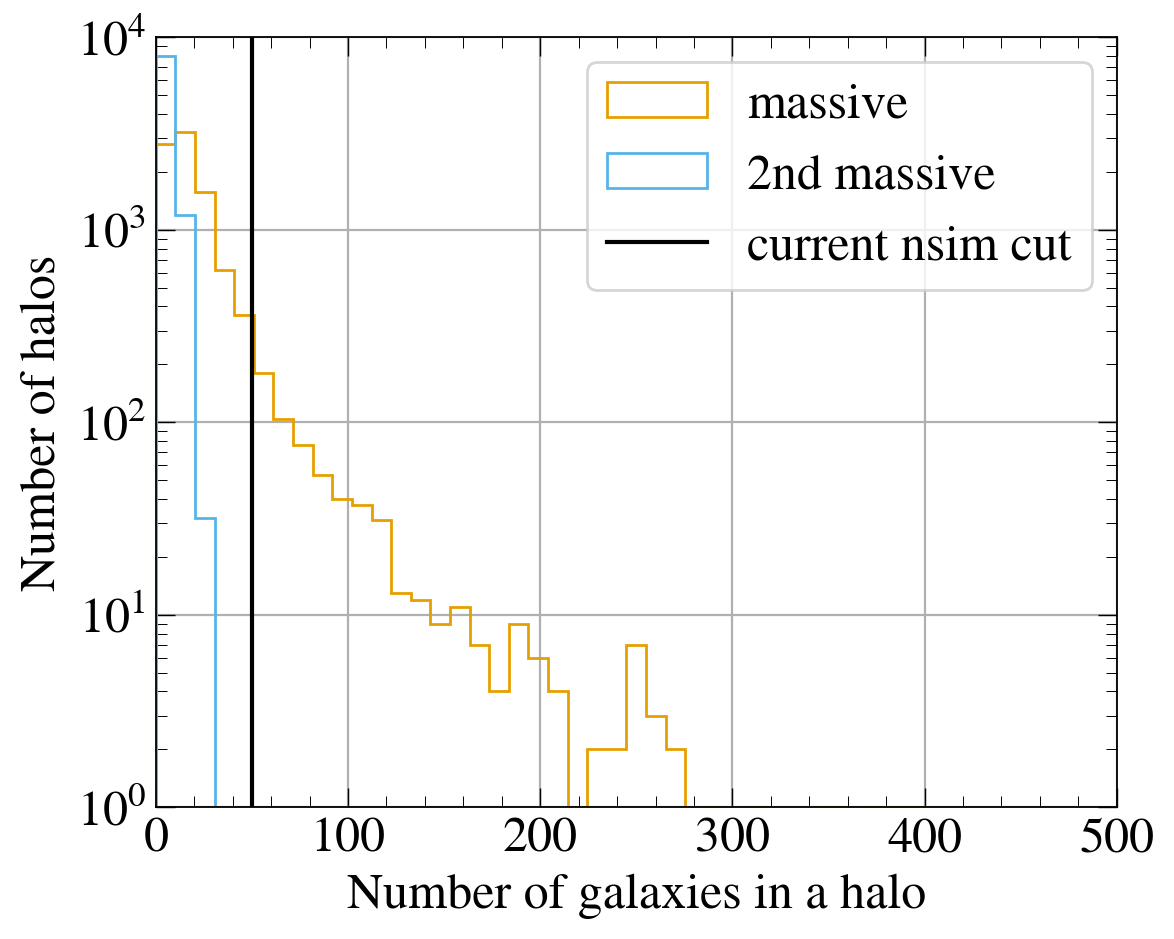

In [86]:
fig, ax = plt.subplots()
BINS = np.linspace(0, 500, 50)
massive_gals.groupby('halo_id').count()['ra'].hist(bins=BINS, label='massive', histtype='step')
pmassive_gals.groupby('halo_id').count()['ra'].hist(bins=BINS, label='2nd massive', histtype='step')
ax.set_yscale('log')
ax.set_xlabel('Number of galaxies in a halo')
ax.axvline(50, color = 'k', label="current nsim cut")
ax.set_ylabel('Number of halos')
ax.set_ylim(1, 1e4)
ax.legend()

(1, 1000000.0)

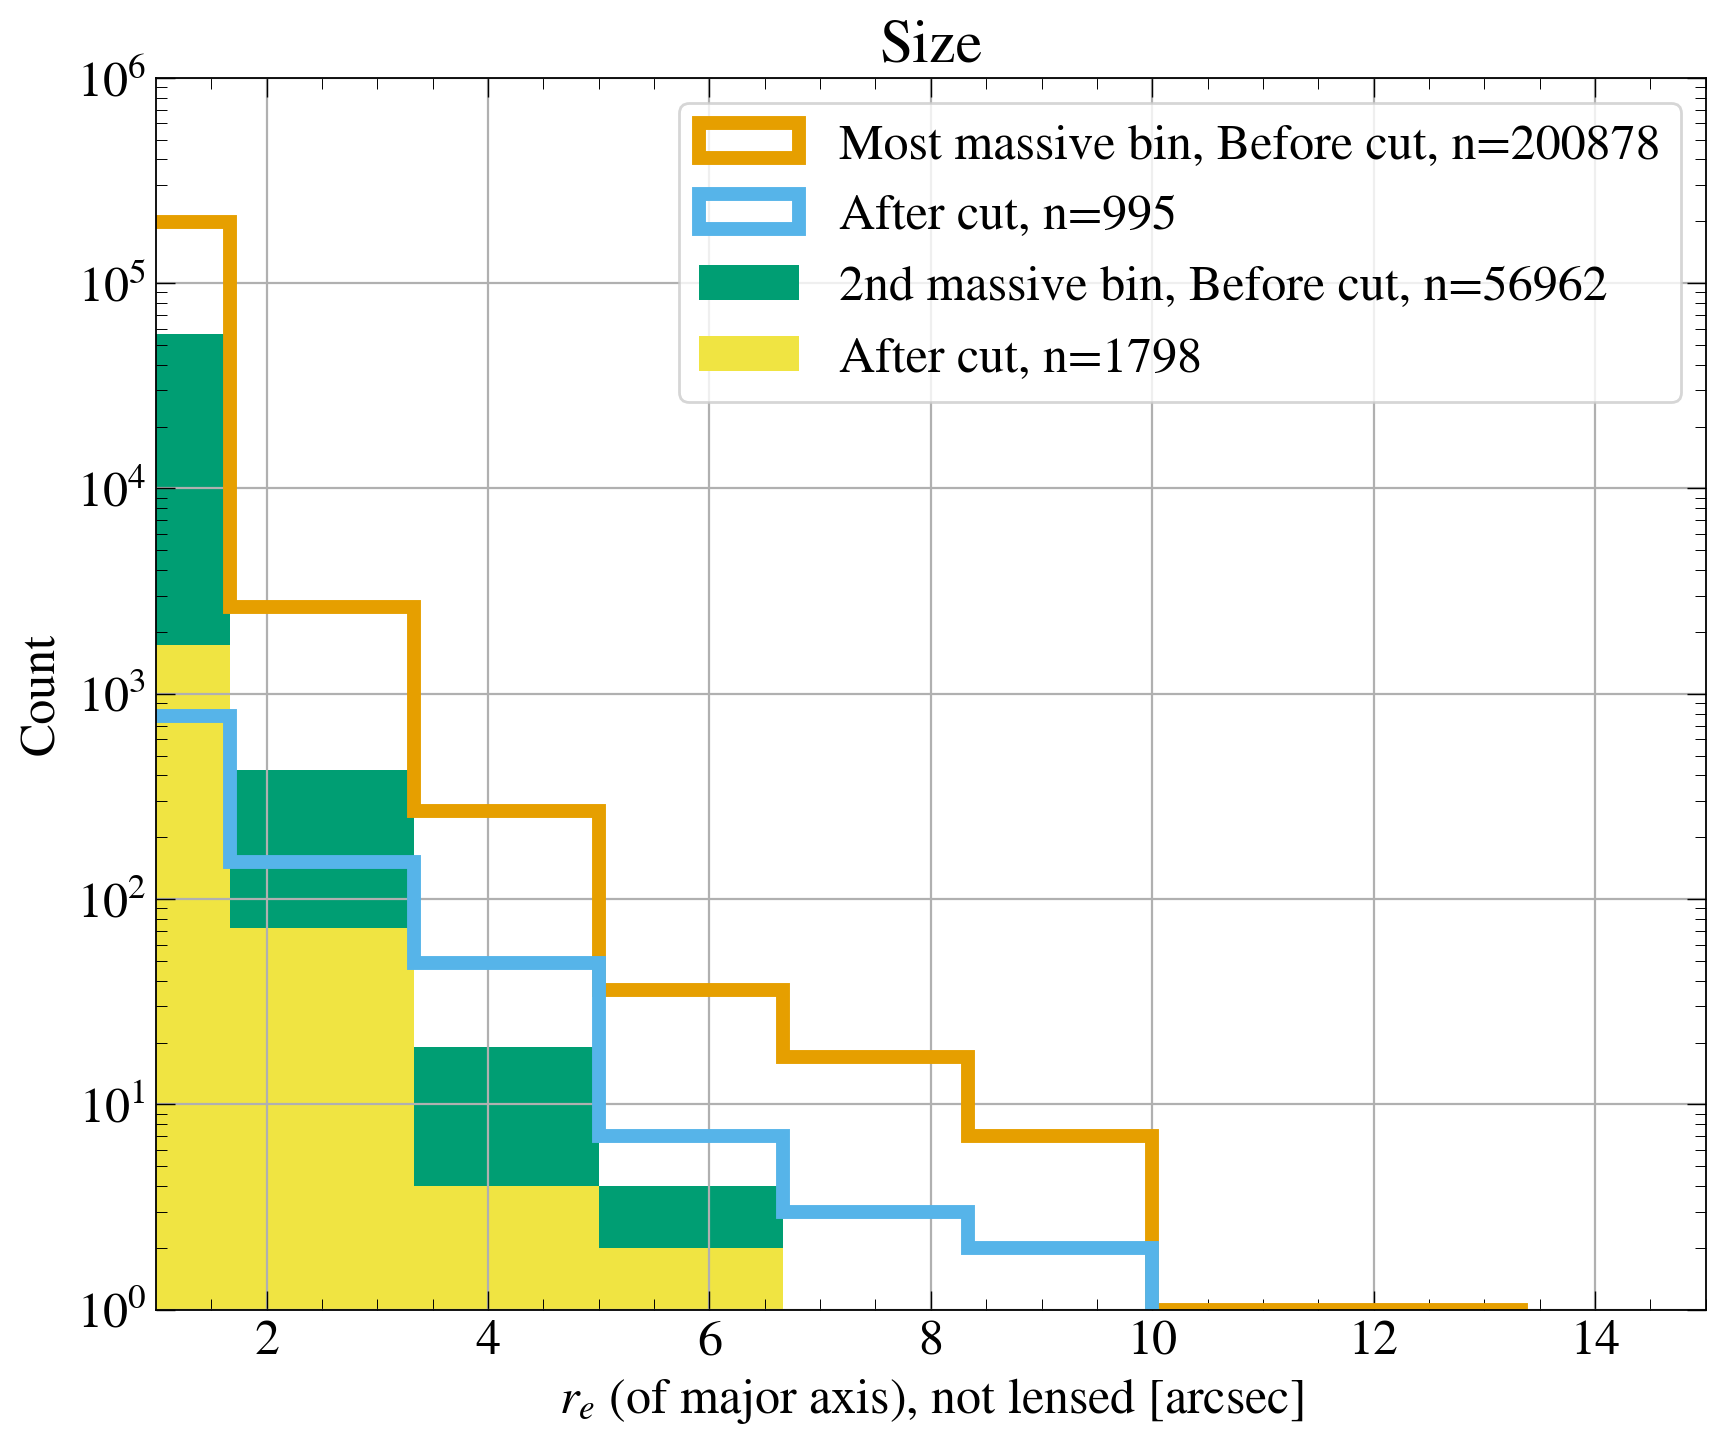

In [56]:
fig, ax = plt.subplots(figsize=(10, 8))
BINS = np.linspace(0, 15, 10)
massive_gals['size_true'].hist(histtype='step',
                               ax=ax,
                               bins=BINS,
                               label='Most massive bin, Before cut, n={}'.format(
                                   len(massive_gals)), linewidth=5)
massive_gals_sur['size_true'].hist(histtype='step',
                                   ax=ax,
                                   bins=BINS,
                                   label='After cut, n={}'.format(
                                       len(massive_gals_sur)), linewidth=5)
pmassive_gals['size_true'].hist(histtype='stepfilled',
                                ax=ax,
                                bins=BINS,
                                label='2nd massive bin, Before cut, n={}'.format(
                                    len(pmassive_gals)))
pmassive_gals_sur['size_true'].hist(histtype='stepfilled',
                                    ax=ax,
                                    bins=BINS,
                                    label='After cut, n={}'.format(
                                        len(pmassive_gals_sur)))
# pmassive_gals_sur['size_true'].hist(histtype='step', ax=ax, label='2nd most massive')
# pmassive_gals['size_true'].hist(histtype='step', ax=ax, label='2nd most massive')
plt.xlabel('$r_e$ (of major axis), not lensed [arcsec]')
plt.ylabel('Count')
plt.yscale('log')
plt.legend(loc='upper right')
plt.title("Size")
ax.set_xlim(1, 15)
ax.set_ylim(1, 1e6)

(1, 1000000.0)

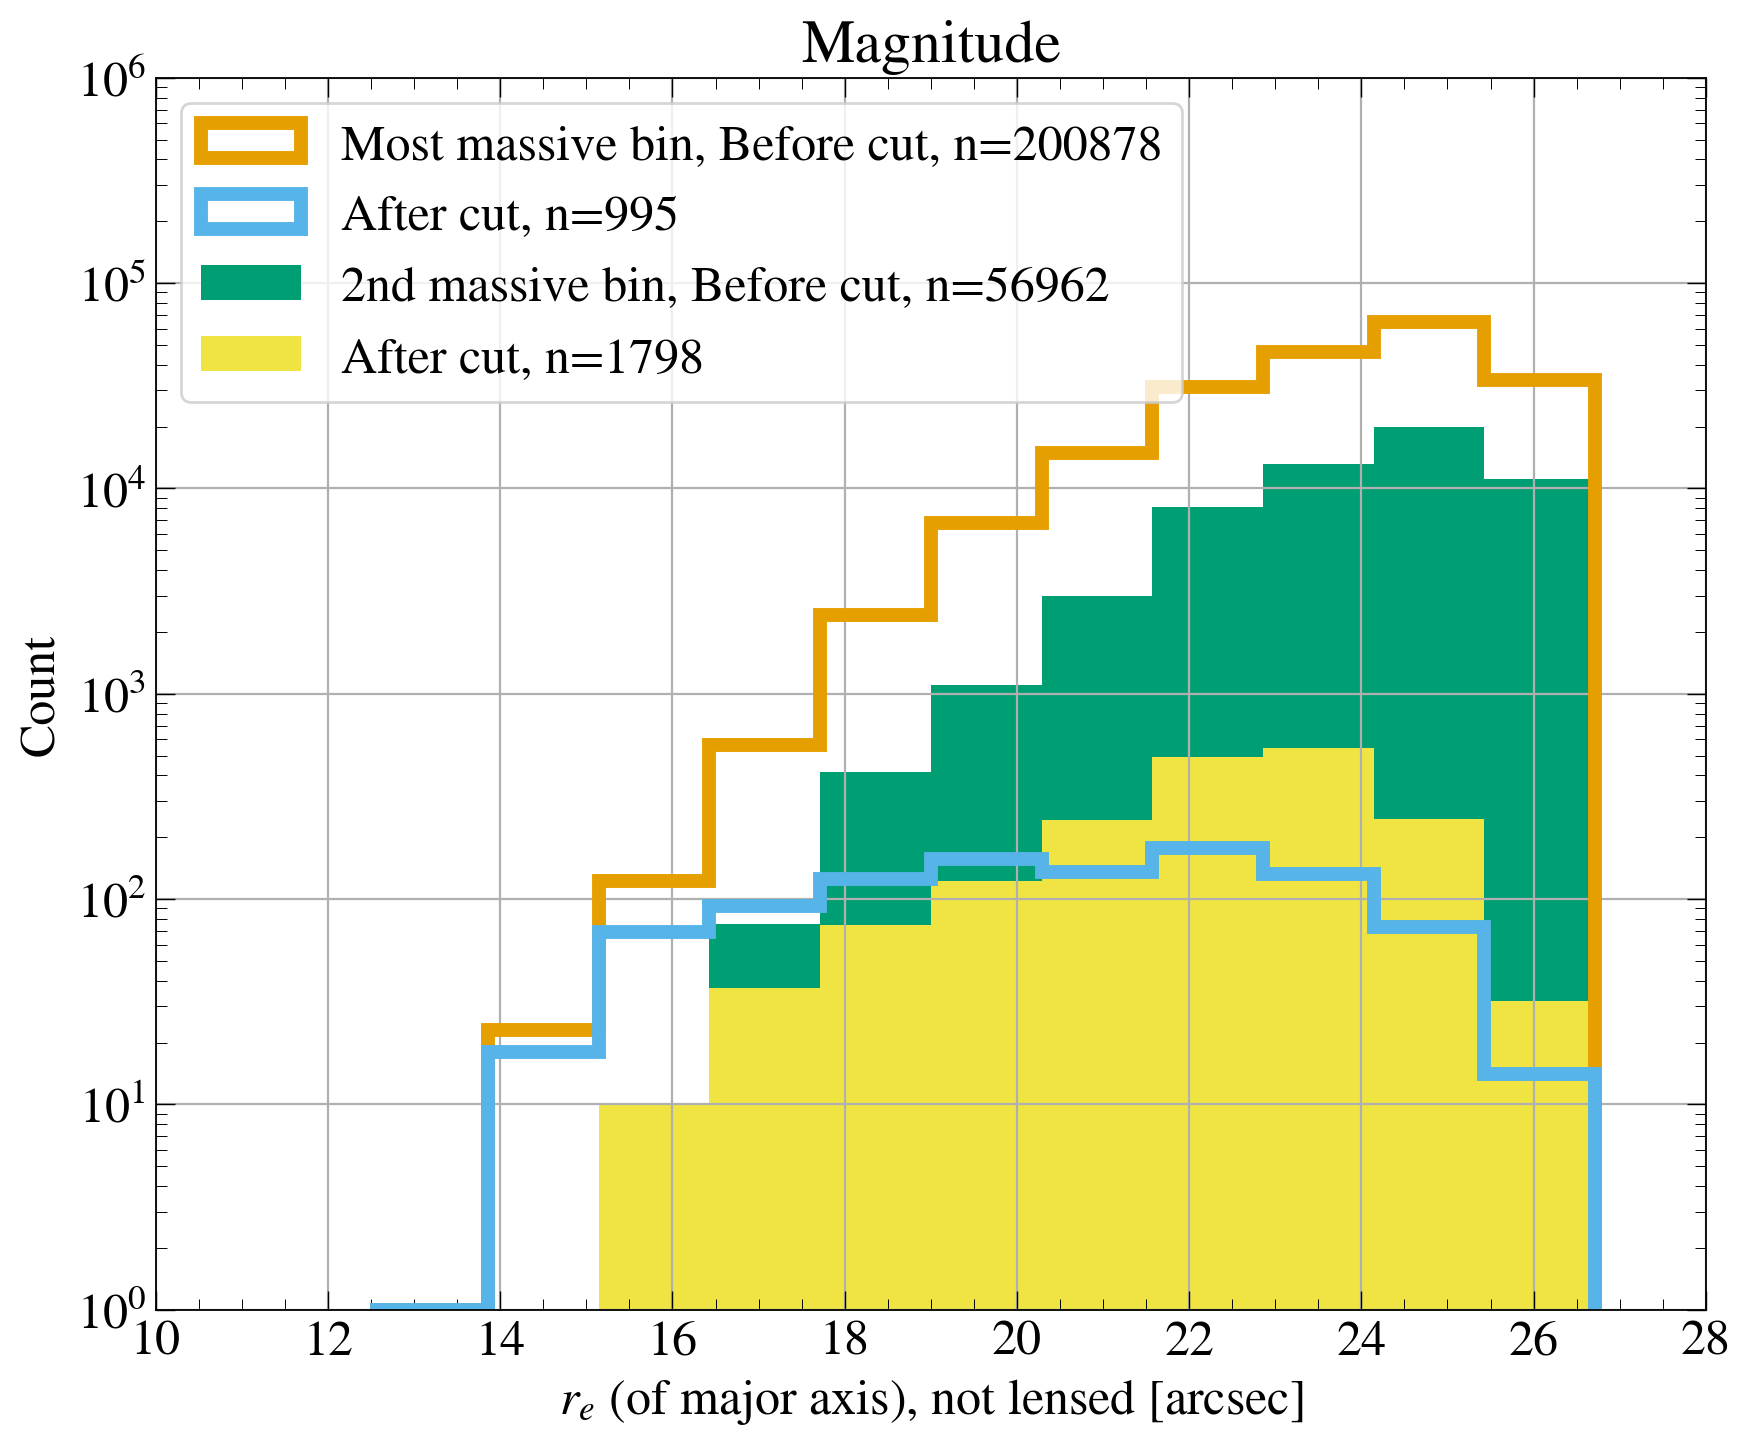

In [68]:
fig, ax = plt.subplots(figsize=(10, 8))
BINS = np.linspace(10,28, 15)
massive_gals['r_ab'].hist(histtype='step',
                               ax=ax,
                               bins=BINS,
                               label='Most massive bin, Before cut, n={}'.format(
                                   len(massive_gals)), linewidth=5)
massive_gals_sur['r_ab'].hist(histtype='step',
                                   ax=ax,
                                   bins=BINS,
                                   label='After cut, n={}'.format(
                                       len(massive_gals_sur)), linewidth=5)
pmassive_gals['r_ab'].hist(histtype='stepfilled',
                                ax=ax,
                                bins=BINS,
                                label='2nd massive bin, Before cut, n={}'.format(
                                    len(pmassive_gals)))
pmassive_gals_sur['r_ab'].hist(histtype='stepfilled',
                                    ax=ax,
                                    bins=BINS,
                                    label='After cut, n={}'.format(
                                        len(pmassive_gals_sur)))
# pmassive_gals_sur['size_true'].hist(histtype='step', ax=ax, label='2nd most massive')
# pmassive_gals['size_true'].hist(histtype='step', ax=ax, label='2nd most massive')
plt.xlabel('$r_e$ (of major axis), not lensed [arcsec]')
plt.ylabel('Count')
plt.yscale('log')
plt.legend(loc='upper left')
plt.title("Magnitude")
# ax.set_xlim(1, 15)
ax.set_ylim(1, 1e6)